# Red Neuronal para Clasificación no Lineal


In [91]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Cree los datos de entrada y salida para una compuerta XOR:


In [92]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

Para una red neuronal con dos neuronas en la capa de entrada, tres en la capa escondidad y una en la salida, inicialize los pesos y sesgos:


In [93]:
w1 = 2 * np.random.random(size=(2, 3)) - 1
w2 = 2 * np.random.random(size=(3, 1)) - 1
b1 = 2 * np.random.random(size=(1, 3)) - 1
b2 = 2 * np.random.random(size=(1, 1)) - 1
eta = 1

Defina la función de activación y su derivada:


In [94]:
def sigmoid(x):
    # Definicion de la función sigmoide
    return 1 / (1 + np.exp(-x))

def dsigmoid(y):
    # Definicion de la derivada de la función sigmoide
    return y * (1 - y)

## Forward pass


In [95]:
def forward_prop(w1, b1, w2, b2, x):
    Neth = np.dot(x, w1) + b1  # Note que es un producto de una matriz por un vector
    Outh = sigmoid(Neth)
    NetO = np.dot(Outh, w2) + b2
    OutO = sigmoid(NetO)
    return Neth, Outh, NetO, OutO

## Backward pass


Implemente las derivadas del error respecto a los parámetros w y b:


In [96]:
def backward_prop(Outh, OutO, w2, x, y):
    delta2 = (OutO - y)*dsigmoid(OutO)
    delta1 = delta2 * w2.T * dsigmoid(Outh)
    dw2 = np.dot(Outh.T,delta2)
    dw1 = np.dot(x.T,delta1)
    db1 = np.sum(delta1, keepdims=True)
    db2 = np.sum(delta2, keepdims=True)
    return dw1, db1, dw2, db2

Implemente la correción de los parámetros:


In [97]:
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, eta):
    w1 -= eta * dw1
    b1 -= eta * db1
    w2 -= eta * dw2
    b2 -= eta * db2
    return w1, b1, w2, b2

## Entrenamiento de la red neuronal


Use el esquema de "Retropropagación" para entrenar la red.


In [98]:
# Implementación de la retropropagación
errors = []
for i in range(10000):
    Neth, Outh, NetO, OutO = forward_prop(w1, b1, w2, b2, x)
    dw1, db1, dw2, db2 = backward_prop(Outh, OutO, w2, x, y)
    w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, eta)
    errors.append([np.sum((y-OutO)**2), i])

Valide del entrenamiento. Con una gráfica del error en funcion de las épocas.


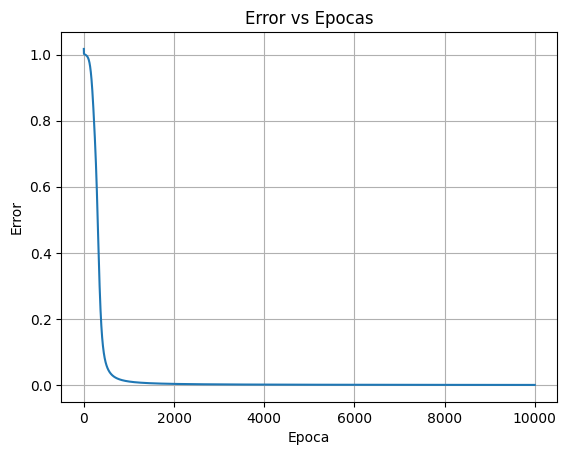

In [99]:
# Gráfica Error vs. Épocas
plt.title("Error vs Epocas")
plt.xlabel("Epoca")
plt.ylabel("Error")
plt.plot(np.array(errors)[:, 1], np.array(errors)[:, 0])
plt.grid()
plt.show()